In [1]:
import math
import matplotlib.pyplot as plt
import random
import os

In [2]:
os.getcwd()

'/Users/aleksandar/Documents/GitHub/simulated_annealing'

In [3]:
#path= "/Users/aleksandar/Documents/GitHub/simulated_annealing/TSP-Configurations/"
#os.chdir(path)

In [4]:
def read_tsp_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    cities = []
    for line in lines:
        parts = line.split()
        if len(parts) == 3 and parts[0].isdigit():
            cities.append((float(parts[1]), float(parts[2])))

    return cities

In [5]:
def calculate_total_distance(tour, cities):
    total_distance = 0
    for i in range(len(tour) - 1):
        city1 = cities[tour[i]]
        city2 = cities[tour[i + 1]]
        distance = math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)
        total_distance += distance

    # Return to the starting city
    total_distance += math.sqrt((cities[tour[-1]][0] - cities[tour[0]][0])**2 +
                                (cities[tour[-1]][1] - cities[tour[0]][1])**2)

    return total_distance

In [6]:
def simulated_annealing(cities, initial_temperature=1000, cooling_rate=0.995, num_iterations=10000):
    num_cities = len(cities)
    current_tour = list(range(num_cities))
    random.shuffle(current_tour)
    current_distance = calculate_total_distance(current_tour, cities)

    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temperature

    for iteration in range(num_iterations):
        # generate a random neighboring tour by swapping two cities
        new_tour = current_tour[:]
        i, j = sorted(random.sample(range(num_cities), 2))
        new_tour[i:j+1] = reversed(new_tour[i:j+1])

        # calculate the new tour distance
        new_distance = calculate_total_distance(new_tour, cities)

        # decide whether to accept the new tour
        if new_distance < current_distance or random.uniform(0, 1) < math.exp((current_distance - new_distance) / temperature):
            current_tour = new_tour
            current_distance = new_distance

            # update the best tour if needed
            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance

        # cool down the temperature
        temperature *= cooling_rate

    return best_tour, best_distance

In [7]:
def plot_tour(tour, cities):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Cities')
    plt.plot(x + [x[tour[0]]], y + [y[tour[0]]], 'r-')
    for i in range(len(tour) - 1):
        plt.plot([x[tour[i]], x[tour[i+1]]], [y[tour[i]], y[tour[i+1]]], 'r-')
    plt.title('Traveling Salesman Problem - Simulated Annealing')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.show()

In [8]:
os.getcwd()

'/Users/aleksandar/Documents/GitHub/simulated_annealing'

In [9]:
# the path to the folder containing the csv file
folder_path = 'TSP-Configurations/'

# the name of the csv file you want to read
file_name = 'eil51.tsp.txt'

# combine the folder path and file name to create the file path
file_path = folder_path + file_name

#file_path = "/Users/aleksandar/Documents/GitHub/simulated_annealing/TSP-Configurations/eil51.tsp"

In [10]:
ls -l /Users/aleksandar/Documents/GitHub/simulated_annealing/TSP-Configurations/eil51.tsp.txt

-rw-r--r--@ 1 aleksandar  staff  579 Jun  1  1995 /Users/aleksandar/Documents/GitHub/simulated_annealing/TSP-Configurations/eil51.tsp.txt


In [11]:
ls -l /Users/aleksandar/Documents/GitHub/simulated_annealing/TSP-Configurations/

total 72
-rw-r--r--@ 1 aleksandar  staff   1092 Jun  1  1995 a280.opt.tour.txt
-rw-r--r--@ 1 aleksandar  staff   3483 Jun  1  1995 a280.tsp.txt
-rw-r--r--@ 1 aleksandar  staff    257 Jun  1  1995 eil51.opt.tour.txt
-rw-r--r--@ 1 aleksandar  staff    579 Jun  1  1995 eil51.tsp.txt
-rw-r--r--@ 1 aleksandar  staff   1777 Jun  1  1995 pcb442.opt.tour.txt
-rw-r--r--@ 1 aleksandar  staff  12414 Jun  1  1995 pcb442.tsp.txt


Best Tour: [17, 26, 50, 45, 11, 46, 16, 3, 12, 40, 39, 18, 41, 43, 14, 44, 32, 38, 9, 29, 33, 20, 28, 1, 15, 49, 8, 48, 36, 4, 37, 10, 31, 0, 21, 19, 34, 35, 2, 27, 30, 25, 7, 47, 5, 22, 6, 42, 23, 13, 24]
Best Distance: 460.51390767611485


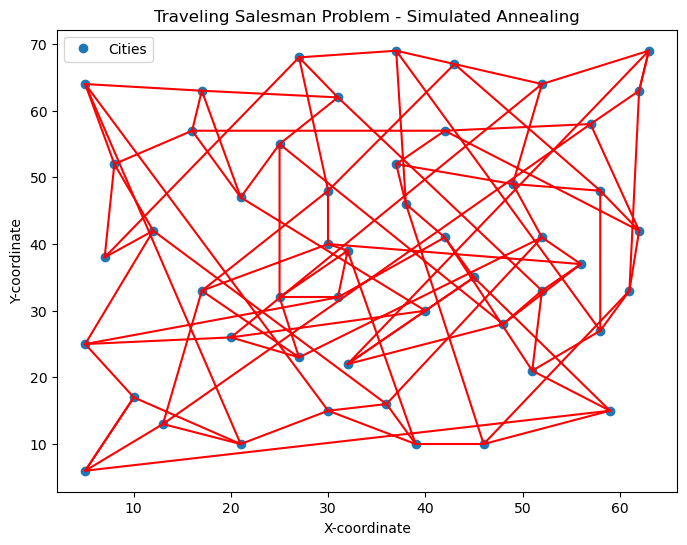

In [12]:
if __name__ == "__main__":
    tsp_file_path = file_path
    cities = read_tsp_file(tsp_file_path)

    best_tour, best_distance = simulated_annealing(cities)

    print("Best Tour:", best_tour)
    print("Best Distance:", best_distance)

    plot_tour(best_tour, cities)

In [13]:
print(tsp_file_path)

TSP-Configurations/eil51.tsp.txt


In [14]:
def two_opt(tour):
    # apply 2-opt move
    i, j = random.sample(range(len(tour)), 2)
    i, j = sorted([i, j])
    new_tour = tour[:i] + tour[i:j+1][::-1] + tour[j+1:]
    return new_tour

In [15]:
def move_city(tour):
    # apply move of a single city
    i, j = random.sample(range(len(tour)), 2)
    city = tour.pop(i)
    tour.insert(j, city)
    return tour

In [16]:
def simulated_annealing_tomc(cities, initial_temperature=1000, cooling_rate=0.995, num_iterations=10000):
    num_cities = len(cities)
    current_tour = list(range(num_cities))
    random.shuffle(current_tour)
    current_distance = calculate_total_distance(current_tour, cities)

    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temperature

    for iteration in range(num_iterations):
        # Choose a random elementary edit
        if random.uniform(0, 1) < 0.5:
            new_tour = two_opt(current_tour)
        else:
            new_tour = move_city(current_tour)

        # Calculate the new tour distance
        new_distance = calculate_total_distance(new_tour, cities)

        # Decide whether to accept the new tour
        if new_distance < current_distance or random.uniform(0, 1) < math.exp((current_distance - new_distance) / temperature):
            current_tour = new_tour
            current_distance = new_distance

            # Update the best tour if needed
            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance

        # Cool down the temperature
        temperature *= cooling_rate

    return best_tour, best_distance

In [17]:
def plot_tour(tour, cities):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Cities')
    plt.plot(x + [x[tour[0]]], y + [y[tour[0]]], 'r-')
    for i in range(len(tour) - 1):
        plt.plot([x[tour[i]], x[tour[i+1]]], [y[tour[i]], y[tour[i+1]]], 'r-')
    plt.title('Traveling Salesman Problem - Simulated Annealing with 2-opt and Single City Move')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.show()

Best Tour: [8, 47, 37, 33, 9, 14, 32, 4, 41, 40, 31, 24, 50, 42, 30, 18, 34, 19, 2, 44, 25, 16, 46, 35, 29, 1, 15, 20, 13, 22, 39, 23, 43, 11, 7, 10, 36, 49, 48, 12, 38, 17, 26, 21, 6, 27, 28, 3, 0, 5, 45]
Best Distance: 1313.7477624216647


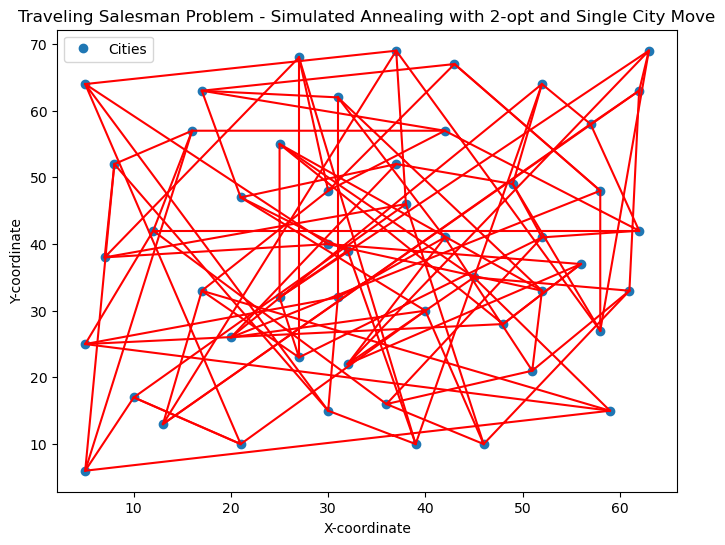

In [18]:
if __name__ == "__main__":
    tsp_file_path = file_path
    cities = read_tsp_file(tsp_file_path)

    best_tour, best_distance = simulated_annealing_tomc(cities)

    print("Best Tour:", best_tour)
    print("Best Distance:", best_distance)

    plot_tour(best_tour, cities)

In [19]:
def run_multiple_simulations(cities, num_simulations=100):
    best_overall_tour = None
    best_overall_distance = float('inf')

    for i in range(num_simulations):
        #print(f"Running Simulation {i + 1}")
        current_tour, current_distance = simulated_annealing(cities)
        if current_distance < best_overall_distance:
            best_overall_tour = current_tour
            best_overall_distance = current_distance

    return best_overall_tour, best_overall_distance

Best Tour: [47, 22, 6, 42, 23, 13, 24, 17, 12, 40, 39, 18, 41, 43, 14, 44, 32, 38, 29, 9, 48, 8, 15, 49, 33, 20, 28, 19, 34, 35, 2, 27, 30, 25, 7, 21, 0, 31, 1, 10, 37, 4, 36, 16, 3, 46, 11, 45, 50, 26, 5]
Best Distance: 441.3545915498067


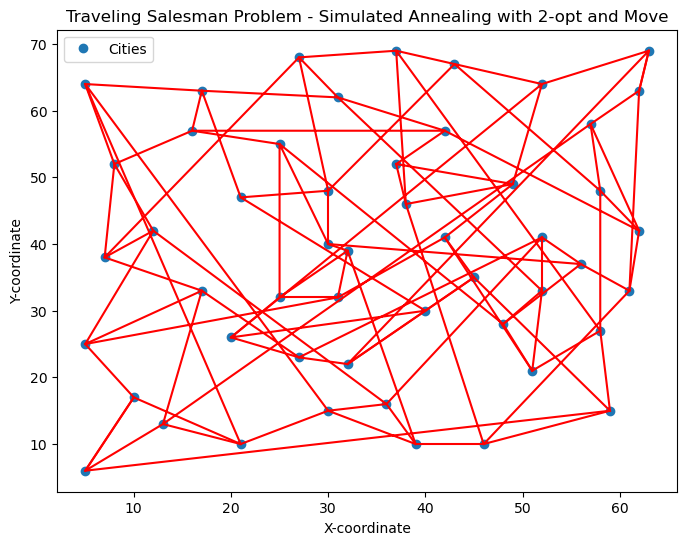

In [20]:
def plot_tour(tour, cities):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Cities')
    plt.plot(x + [x[tour[0]]], y + [y[tour[0]]], 'r-')
    for i in range(len(tour) - 1):
        plt.plot([x[tour[i]], x[tour[i+1]]], [y[tour[i]], y[tour[i+1]]], 'r-')
    plt.title('Traveling Salesman Problem - Simulated Annealing with 2-opt and Move')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    tsp_file_path = file_path
    cities = read_tsp_file(tsp_file_path)

    best_tour, best_distance = run_multiple_simulations(cities, num_simulations=100)

    print("Best Tour:", best_tour)
    print("Best Distance:", best_distance)

    plot_tour(best_tour, cities)